In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import plotly.express as px
import plotly.graph_objects as go
import folium as fl
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)


ModuleNotFoundError: No module named 'plotly'

In [8]:
listings_df = pd.read_csv("./listings.csv.gz")
listings_df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,https://www.airbnb.com/rooms/11508,20230628025456,2023-06-29,city scrape,Condo in Buenos Aires · ★4.81 · 1 bedroom · 1 ...,LUXURIOUS 1 BDRM APT- POOL/ GYM/ SPA/ 24-HR SE...,AREA: PALERMO SOHO<br /><br />Minutes walking ...,https://a0.muscache.com/pictures/19357696/b1de...,42762,...,4.97,4.94,4.89,NaN,f,1,1,0,0,0.27
1,14222,https://www.airbnb.com/rooms/14222,20230628025456,2023-06-28,city scrape,Rental unit in Palermo/Buenos Aires · ★4.78 · ...,Beautiful cozy apartment in excellent location...,Palermo is such a perfect place to explore the...,https://a0.muscache.com/pictures/4695637/bbae8...,87710233,...,4.90,4.89,4.75,NaN,f,6,6,0,0,0.81
2,206738,https://www.airbnb.com/rooms/206738,20230628025456,2023-06-29,city scrape,Rental unit in Buenos Aires · ★4.71 · 3 bedroo...,Recently renovated 3 bedroom apartment in Pale...,Palermo is fortunate to have great transport l...,https://a0.muscache.com/pictures/8b3b1257-fe36...,1011896,...,4.80,4.84,4.68,NaN,f,11,11,0,0,0.30
3,210040,https://www.airbnb.com/rooms/210040,20230628025456,2023-06-29,city scrape,Condo in Buenos Aires · ★4.92 · 1 bedroom · 1 ...,Modern studio apartment on the 13th floor with...,If you’re an expat or vacationer spending time...,https://a0.muscache.com/pictures/2796ebd8-cbee...,319901,...,4.93,4.93,4.73,NaN,f,24,24,0,0,0.65
4,92228,https://www.airbnb.com/rooms/92228,20230628025456,2023-06-28,city scrape,Rental unit in Buenos Aires · 2 bedrooms · 3 b...,<b>The space</b><br />Departamento de 3 ambien...,"El barrio es muy residencial, con dos supermer...",https://a0.muscache.com/pictures/b44a79ec-af05...,494027,...,5.00,5.00,5.00,NaN,t,2,2,0,0,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26199,923195625840585655,https://www.airbnb.com/rooms/923195625840585655,20230628025456,2023-06-29,city scrape,Rental unit in Buenos Aires · ★New · Studio · ...,Una division de vidrio repartido sectoriza sin...,Palermo Hollywood es uno de los barrios más mo...,https://a0.muscache.com/pictures/miso/Hosting-...,1028764,...,NaN,NaN,NaN,NaN,t,76,76,0,0,NaN
26200,923212677801946586,https://www.airbnb.com/rooms/923212677801946586,20230628025456,2023-06-28,city scrape,Rental unit in Buenos Aires · ★New · 1 bedroom...,"Departamento super equipado, hasta 4 personas....",Poder alojarse en Primera Junta es una experie...,https://a0.muscache.com/pictures/miso/Hosting-...,76385222,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
26201,923235409583837730,https://www.airbnb.com/rooms/923235409583837730,20230628025456,2023-06-28,city scrape,Rental unit in Buenos Aires · ★New · Studio · ...,"With a cosmopolitan and modern atmosphere, it ...",NaN,https://a0.muscache.com/pictures/prohost-api/H...,501358052,...,NaN,NaN,NaN,NaN,t,32,32,0,0,NaN
26202,923265334032756442,https://www.airbnb.com/rooms/923265334032756442,20230628025456,2023-06-28,city scrape,Rental unit in Buenos Aires · ★New · 4 bedroom...,Discover a gem in the heart of Buenos Aires wi...,Retiro neighborhood in Buenos Aires is a vibra...,https://a0.muscache.com/pictures/miso/Hosting-...,468392547,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


In [9]:
rental_price = listings_df.loc[:, 'price']

In [12]:
listings_df[
    ["price","host_response_rate","host_acceptance_rate"]
].dtypes

price                   object
host_response_rate      object
host_acceptance_rate    object
dtype: object

In [47]:
listings_df[
    ["price","host_response_rate","host_acceptance_rate"]
].head()

,price,host_response_rate,host_acceptance_rate
0,17339.0,1.0,0.79
1,7807.0,1.0,1.00
2,61868.0,1.0,0.89
3,15330.0,1.0,0.99
4,20381.0,NaN,0.00


In [46]:
listings_df["price"] = listings_df["price"].str[1:].str.replace(",","").astype("float")
listings_df["host_response_rate"] = listings_df["host_response_rate"].str[:-1].astype("float") / 100
listings_df["host_acceptance_rate"] = listings_df["host_acceptance_rate"].str[:-1].astype("float") / 100

AttributeError: Can only use .str accessor with string values!

In [18]:
listings_df[["bathrooms_text"]].head()

,bathrooms_text
0,1 bath
1,1 bath
2,1 bath
3,1 bath
4,1 bath


In [22]:
listings_df["bathroom_qty"] = listings_df["bathrooms_text"].str.split(" ", expand=True)[0]
listings_df["bathroom_type"] = listings_df["bathrooms_text"].str.split(" ", expand=True)[1]


In [23]:
import seaborn as sns
sns.set_theme(font_scale=1.5, style="darkgrid")

c:\Users\jonna\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


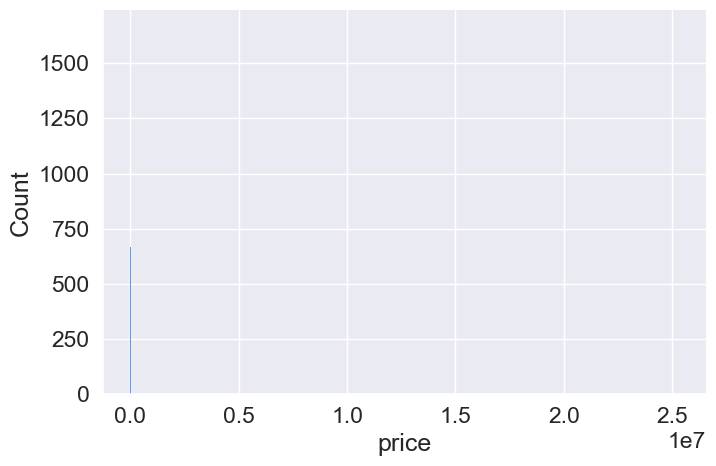

In [24]:
sns.displot(data=listings_df, x="price", kind="hist", aspect=1.5)

c:\Users\jonna\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


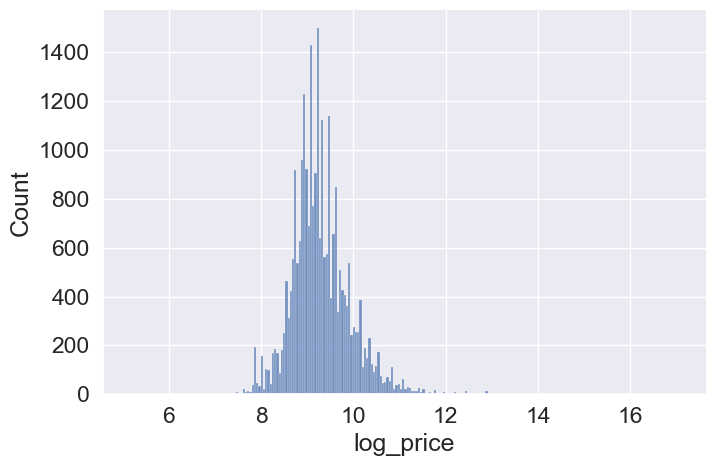

In [25]:
listings = listings_df[listings_df.price!=0]
listings.loc[:,"log_price"] = np.log(listings.loc[:,"price"])
sns.displot(data=listings, x="log_price", kind="hist", aspect=1.5)

In [26]:
listings.groupby(
    ["host_identity_verified"], 
    as_index=False
).agg(
    avg_price = ("price","mean"),
    qty = ("price","count")
)

,host_identity_verified,avg_price,qty
0,f,42355.688525,1342
1,t,16189.252474,24862


In [27]:
listings.groupby(
    ["host_response_time"], as_index=False
).agg(
    avg_price = ("price","mean"),
    qty = ("price","count")
).sort_values(
    by="avg_price", ascending=False
).reset_index(drop=True)


,host_response_time,avg_price,qty
0,a few days or more,24519.239163,669
1,within a day,18484.092835,1605
2,within a few hours,14850.199124,3425
3,within an hour,14706.514757,16534


c:\Users\jonna\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


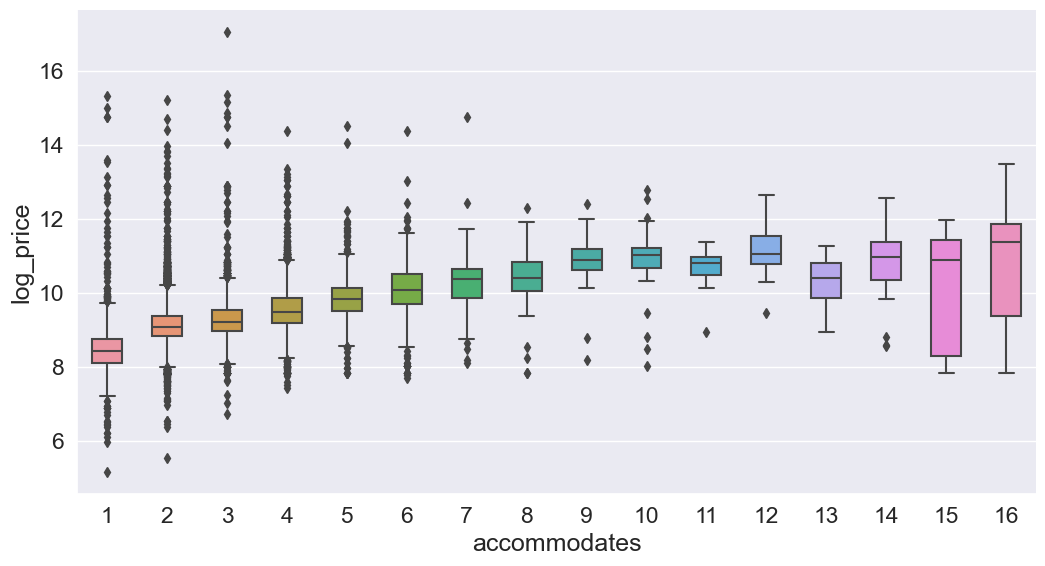

In [28]:
sns.catplot(
    data=listings, 
    x='accommodates', y='log_price', kind='box',
    height=6, aspect=1.8, width=0.5
)

In [30]:
listings_df[[ 
    'availability_30', 'availability_60', 
    'availability_90', 'availability_365',
    'price'
]].corr()

,availability_30,availability_60,availability_90,availability_365,price
availability_30,1.000000,0.905705,0.822588,0.404077,-0.005658
availability_60,0.905705,1.000000,0.966118,0.500140,-0.011079
availability_90,0.822588,0.966118,1.000000,0.548973,-0.014351
availability_365,0.404077,0.500140,0.548973,1.000000,-0.009376
price,-0.005658,-0.011079,-0.014351,-0.009376,1.000000


In [31]:
listings.groupby(
    ['instant_bookable'], as_index=False
).agg(
    avg_price = ("price","mean"),
    qty = ("price","count")
)

,instant_bookable,avg_price,qty
0,f,18392.082931,18449
1,t,15476.852482,7755


c:\Users\jonna\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


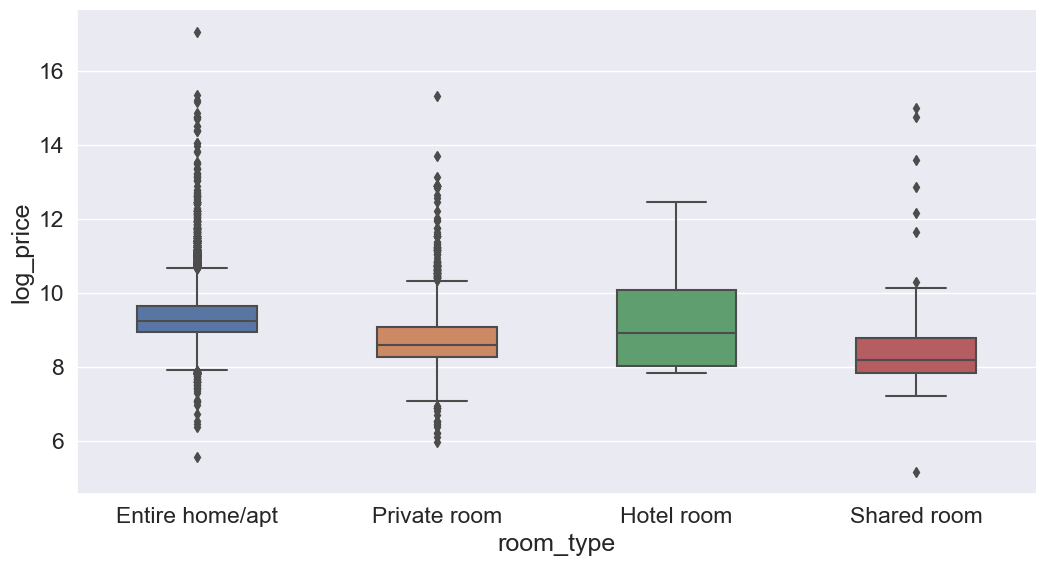

In [32]:
sns.catplot(
    data=listings, 
    x='room_type', y='log_price', kind='box',
    height=6, aspect=1.8, width=0.5
)

c:\Users\jonna\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


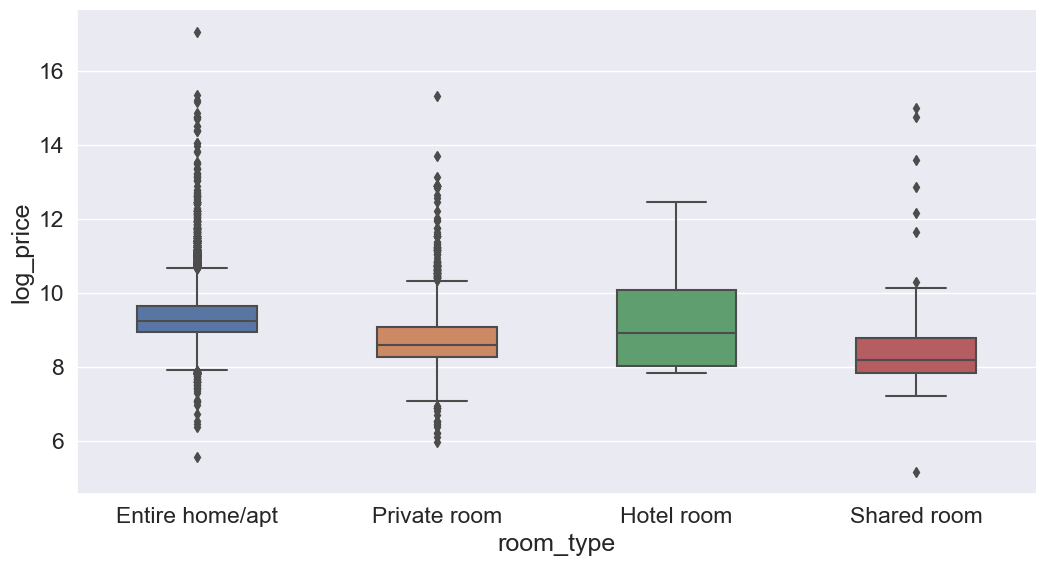

In [34]:
sns.catplot(
    data=listings, 
    x='room_type', y='log_price', kind='box',
    height=6, aspect=1.8, width=0.5
)

In [35]:
listings_df.loc[:,"has_coffee_maker"] = ['coffee maker' in row.lower() for row in listings_df.amenities]

In [36]:
listings_df.has_coffee_maker.value_counts()

has_coffee_maker
True     15743
False    10461
Name: count, dtype: int64

In [38]:
listings_df.groupby(
    ["has_coffee_maker"]
).agg(
    avg_price = ("price", "mean")
)

,avg_price
has_coffee_maker,
False,17607.141765
True,17477.623007


In [40]:
rental_price = listings_df.loc[:, 'price']

In [41]:
mean_rent = np.mean(rental_price)
print('The average rental price is: $', round(mean_rent, 2))

The average rental price is: $ 17529.33


In [42]:
max_rent = np.max(rental_price)
print('The maximum rental price is: $', round(max_rent, 2))

The maximum rental price is: $ 25295088.0


In [43]:
min_rent = np.min(rental_price)
print('The minimum rental price is: $', round(min_rent, 2))


The minimum rental price is: $ 175.0


In [44]:
rent_std = np.std(rental_price)
print('The standard deviation of rental prices is: $', round(rent_std, 2))

The standard deviation of rental prices is: $ 175398.42


In [48]:
median_rent = np.median(rental_price)
print('The median rental price is: $', round(median_rent, 2))

The median rental price is: $ 10190.0


In [51]:
# Assigning variable
region = listings_df.loc[:, 'neighbourhood_cleansed']

In [52]:
# Extracting unique values from the variable
unique_regions = pd.unique(region)
print('Number of distinct regions:', unique_regions)

Number of distinct regions: ['Palermo' 'Recoleta' 'Nuñez' 'Monserrat' 'Balvanera' 'Retiro'
 'Constitucion' 'Barracas' 'San Nicolas' 'Chacarita' 'Almagro'
 'Puerto Madero' 'Villa Crespo' 'Belgrano' 'Coghlan' 'Parque Chacabuco'
 'San Cristobal' 'Villa Urquiza' 'San Telmo' 'Boedo' 'Colegiales' 'Boca'
 'Caballito' 'Villa Luro' 'Villa Devoto' 'Saavedra' 'Flores'
 'Monte Castro' 'Villa Ortuzar' 'Villa Gral. Mitre' 'Velez Sarsfield'
 'Parque Patricios' 'Villa Del Parque' 'Floresta' 'Paternal'
 'Villa Pueyrredon' 'Villa Santa Rita' 'Liniers' 'Agronomia'
 'Parque Avellaneda' 'Villa Real' 'Parque Chas' 'Villa Lugano' 'Versalles'
 'Nueva Pompeya' 'Villa Riachuelo' 'Villa Soldati' 'Mataderos']


In [53]:
unique_regions_count = listings_df['neighbourhood_cleansed'].value_counts().count()
print('Number of distinct regions:', unique_regions_count)

Number of distinct regions: 48


In [55]:
percent_by_region = round(listings_df['neighbourhood_cleansed'].value_counts(normalize=True) * 100, 2)
percent_by_region

neighbourhood_cleansed
Palermo              33.58
Recoleta             14.86
San Nicolas           5.87
Belgrano              5.41
Retiro                4.77
Monserrat             3.99
Almagro               3.56
Villa Crespo          3.40
Balvanera             3.23
San Telmo             2.71
Colegiales            2.38
Nuñez                 2.29
Caballito             1.96
Chacarita             1.64
Constitucion          1.28
Villa Urquiza         1.24
Puerto Madero         1.14
Barracas              0.78
Saavedra              0.72
San Cristobal         0.53
Flores                0.47
Villa Ortuzar         0.40
Coghlan               0.36
Villa Devoto          0.35
Boca                  0.34
Boedo                 0.32
Villa Del Parque      0.31
Parque Chacabuco      0.26
Parque Patricios      0.26
Parque Chas           0.23
Villa Pueyrredon      0.21
Paternal              0.16
Agronomia             0.15
Floresta              0.14
Villa Santa Rita      0.13
Villa Luro            0.10
Matad